In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal=sns.color_palette()
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [95]:
import pandas as pd
df = pd.read_excel('rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx')

In [96]:
df=df[["Tarih","İstanbul günlük tüketim(m³/gün)"]]

In [97]:
df = df[['Tarih', 'İstanbul günlük tüketim(m³/gün)']]
df = df.set_index("Tarih")
df.index = pd.to_datetime(df.index)
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)
df = np.log(df)

In [98]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

In [99]:
def create_features(df):
    df=df.copy()
    df['dayofweek']= df.index.dayofweek
    df['quarter']= df.index.quarter
    df['month']= df.index.month
    df['year']= df.index.year
    df['dayofyear']= df.index.dayofyear
    return df
df=create_features(df)

In [100]:
train=create_features(train)
test=create_features(test)
FEATURES=['dayofweek','quarter','month','year','dayofyear']
TARGET='İstanbul günlük tüketim(m³/gün)'

In [101]:
X_train=train[FEATURES]
y_train=train[TARGET]

X_test=test[FEATURES]
y_test=test[TARGET]

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

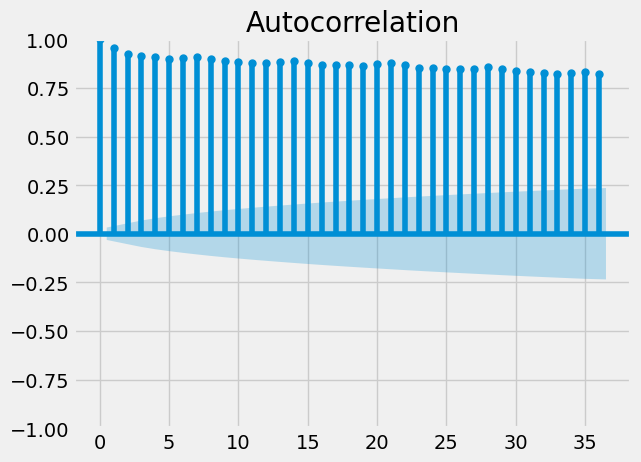

In [103]:
acf_original = plot_acf(y_train)

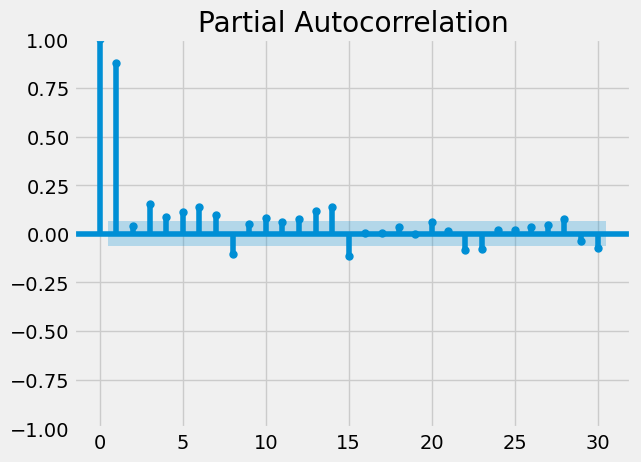

In [104]:
pacf_original = plot_pacf(y_test)

In [105]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(y_train)
print(f'p-value: {adf_test[0]}')

p-value: -2.800551303911459


<Axes: xlabel='Tarih'>

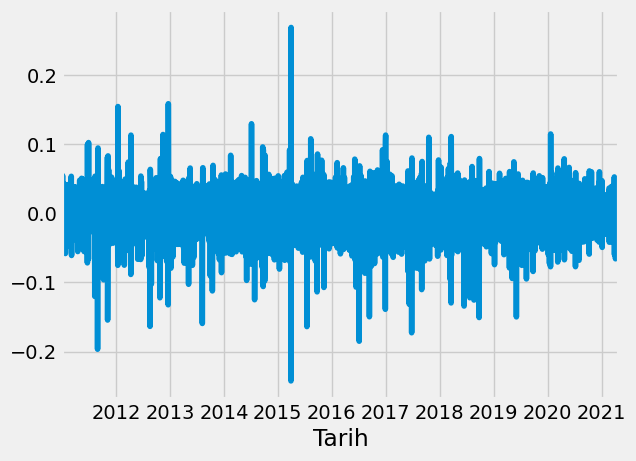

In [106]:
df_train_diff = y_train.diff().dropna()
df_train_diff.plot()

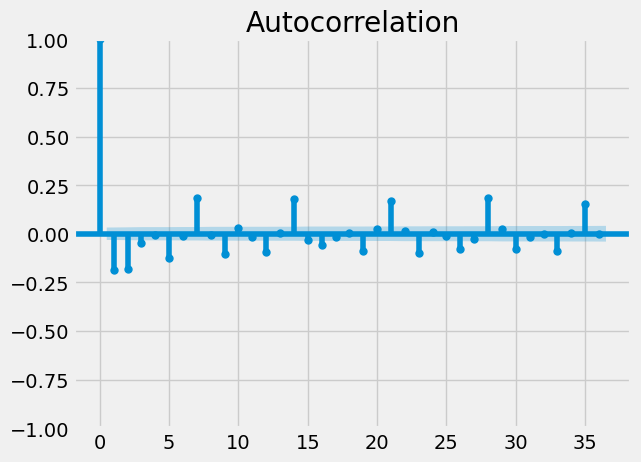

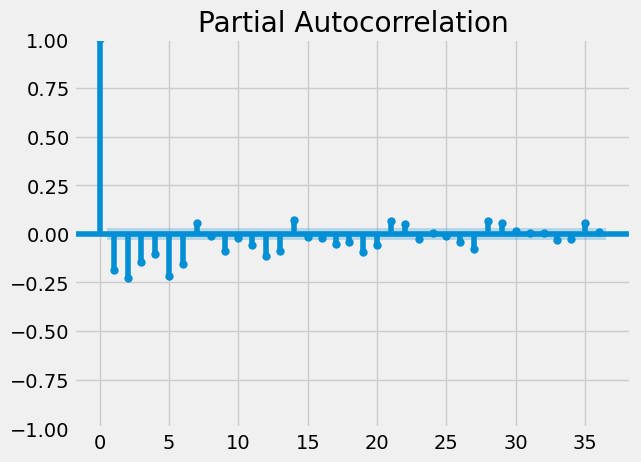

In [107]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [108]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 5.318477632623736e-26


In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
# Veriyi normalize etme
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()


In [111]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3771
Model:                 ARIMA(5, 1, 0)   Log Likelihood                5691.708
Date:                Sun, 02 Jun 2024   AIC                         -11371.415
Time:                        15:33:26   BIC                         -11334.006
Sample:                             0   HQIC                        -11358.115
                               - 3771                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2993      0.010    -30.579      0.000      -0.319      -0.280
ar.L2         -0.3237      0.015    -21.281      0.000      -0.354      -0.294
ar.L3         -0.2341      0.016    -14.804      0.0

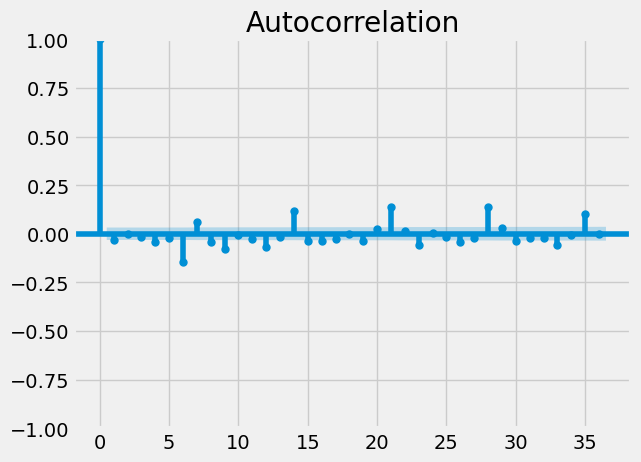

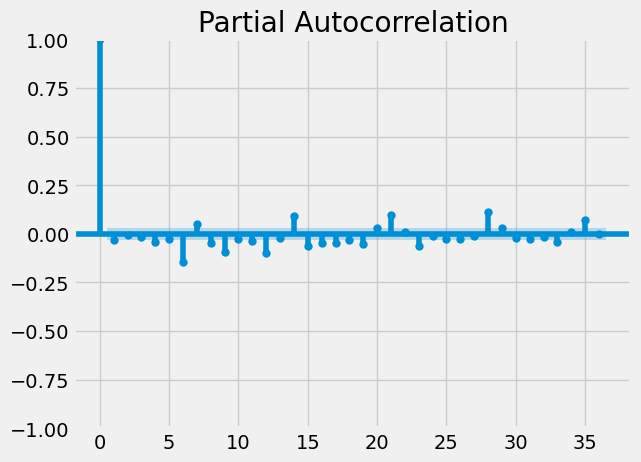

In [113]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

In [114]:
len(test)

943

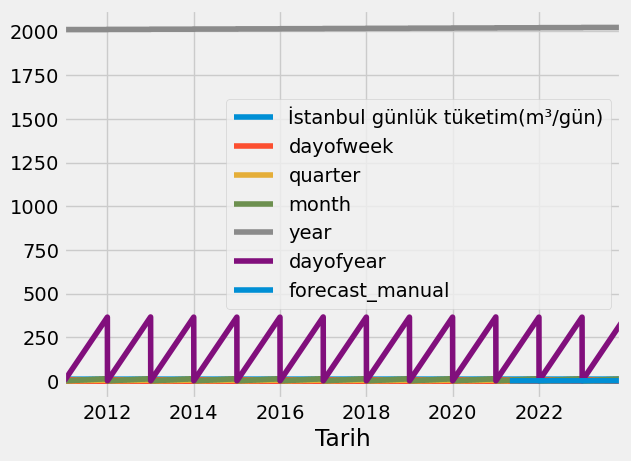

In [115]:
forecast_test = model_fit.forecast(len(X_test))

df['forecast_manual'] = [None]*len(y_train) + list(forecast_test)

df.plot();

In [116]:
forecast_test

array([0.63213172, 0.63600922, 0.62338546, 0.63248525, 0.63444989,
       0.62997135, 0.62979143, 0.63208245, 0.63019166, 0.63037143,
       0.63140065, 0.63113661, 0.6306537 , 0.63102568, 0.63092269,
       0.63076527, 0.6308963 , 0.6309759 , 0.63088239, 0.6309025 ,
       0.63092077, 0.63088889, 0.63088593, 0.63090994, 0.63090375,
       0.63089982, 0.63090483, 0.63090272, 0.63089844, 0.63090123,
       0.6309023 , 0.63090134, 0.63090179, 0.63090219, 0.63090136,
       0.6309013 , 0.63090163, 0.63090158, 0.63090155, 0.63090169,
       0.63090163, 0.63090155, 0.63090157, 0.63090159, 0.63090158,
       0.6309016 , 0.6309016 , 0.63090159, 0.63090158, 0.63090159,
       0.63090159, 0.63090159, 0.63090159, 0.63090159, 0.63090159,
       0.63090159, 0.63090159, 0.63090159, 0.63090159, 0.63090159,
       0.63090159, 0.63090159, 0.63090159, 0.63090159, 0.63090159,
       0.63090159, 0.63090159, 0.63090159, 0.63090159, 0.63090159,
       0.63090159, 0.63090159, 0.63090159, 0.63090159, 0.63090

In [117]:
len(forecast_test)

943

In [118]:
import pmdarima as pm
auto_arima = pm.auto_arima(y_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 5), scoring_args={}, suppress_warnings=True)

In [119]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3771
Model:               SARIMAX(0, 1, 5)   Log Likelihood                5719.956
Date:                Sun, 02 Jun 2024   AIC                         -11425.913
Time:                        15:34:26   BIC                         -11382.269
Sample:                             0   HQIC                        -11410.395
                               - 3771                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.000      0.583      0.560      -0.000       0.001
ma.L1         -0.3376      0.010    -33.840      0.000      -0.357      -0.318
ma.L2         -0.2483      0.015    -16.194      0.000      -0.278      -0.218
ma.L3         -0.0926      0.018     -5.161      0.000      -0.128      -0.057
ma.L4         -0.0205      0.018     -1.119      0.263      -0.056       0.015
ma.L5         -0.0728      0.018     -4.141      0.000      -0.107      -0.038
sigma2         0.0028    3.7e-05     75.969      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              5632.62
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

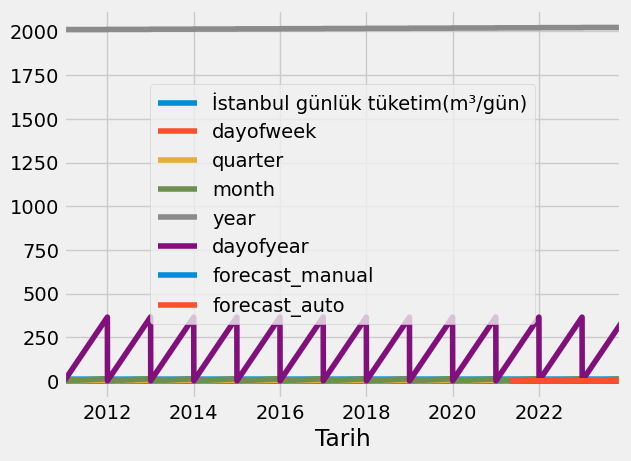

In [120]:
forecast_test_auto = auto_arima.predict(n_periods=len(X_test))
df['forecast_auto'] = [None]*len(y_train) + list(forecast_test_auto)

df.plot();

In [121]:
pred5=forecast_test_auto

In [122]:
pred5

array([0.6269037 , 0.63441261, 0.63238862, 0.63460709, 0.63579367,
       0.63592075, 0.63604783, 0.63617491, 0.63630199, 0.63642908,
       0.63655616, 0.63668324, 0.63681032, 0.6369374 , 0.63706448,
       0.63719156, 0.63731864, 0.63744572, 0.6375728 , 0.63769988,
       0.63782696, 0.63795404, 0.63808112, 0.6382082 , 0.63833528,
       0.63846236, 0.63858944, 0.63871652, 0.6388436 , 0.63897068,
       0.63909776, 0.63922484, 0.63935192, 0.639479  , 0.63960608,
       0.63973316, 0.63986024, 0.63998733, 0.64011441, 0.64024149,
       0.64036857, 0.64049565, 0.64062273, 0.64074981, 0.64087689,
       0.64100397, 0.64113105, 0.64125813, 0.64138521, 0.64151229,
       0.64163937, 0.64176645, 0.64189353, 0.64202061, 0.64214769,
       0.64227477, 0.64240185, 0.64252893, 0.64265601, 0.64278309,
       0.64291017, 0.64303725, 0.64316433, 0.64329141, 0.64341849,
       0.64354557, 0.64367266, 0.64379974, 0.64392682, 0.6440539 ,
       0.64418098, 0.64430806, 0.64443514, 0.64456222, 0.64468

In [125]:
# Tahminleri orijinal ölçeğe döndürme
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler_y.inverse_transform(forecast_test_auto.reshape(-1, 1))

In [126]:
# Hata metriklerini hesaplama
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
mape = mean_absolute_percentage_error(y_test_orig, y_pred_orig) * 100

print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 0.0088
Root Mean Squared Error (RMSE): 0.0940
Mean Absolute Error (MAE): 0.0757292965135833
Mean Absolute Percentage Error (MAPE): 0.7308850119980375


In [132]:
pred5=y_pred_orig

In [133]:
pred5

array([[10.21306628],
       [10.21708313],
       [10.2160004 ],
       [10.21718716],
       [10.21782192],
       [10.2178899 ],
       [10.21795788],
       [10.21802586],
       [10.21809384],
       [10.21816182],
       [10.2182298 ],
       [10.21829778],
       [10.21836576],
       [10.21843375],
       [10.21850173],
       [10.21856971],
       [10.21863769],
       [10.21870567],
       [10.21877365],
       [10.21884163],
       [10.21890961],
       [10.21897759],
       [10.21904557],
       [10.21911355],
       [10.21918153],
       [10.21924952],
       [10.2193175 ],
       [10.21938548],
       [10.21945346],
       [10.21952144],
       [10.21958942],
       [10.2196574 ],
       [10.21972538],
       [10.21979336],
       [10.21986134],
       [10.21992932],
       [10.2199973 ],
       [10.22006529],
       [10.22013327],
       [10.22020125],
       [10.22026923],
       [10.22033721],
       [10.22040519],
       [10.22047317],
       [10.22054115],
       [10

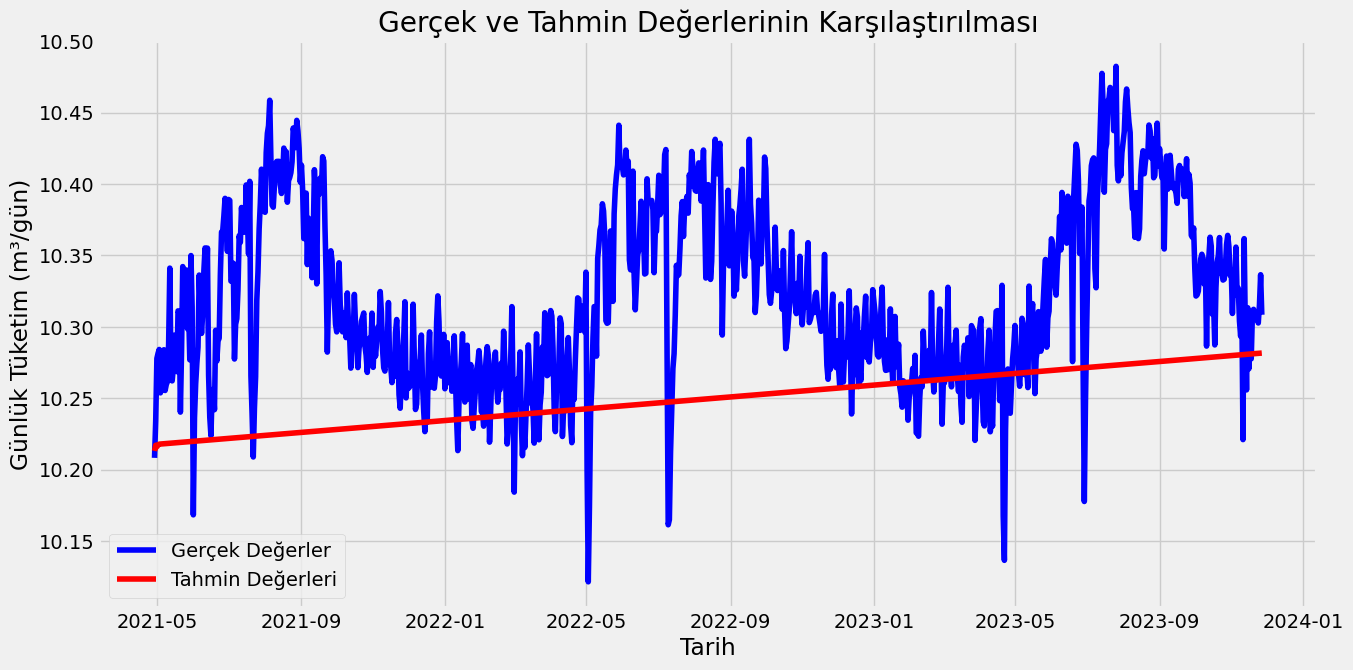

In [140]:
# Gerçek ve tahmin değerleri birleştirme
results = pd.DataFrame({'Tarih': test.index, 'Gerçek': y_test_orig.flatten(), 'Tahmin': y_pred_orig.flatten()})
results = results.set_index('Tarih')

# Görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.title('Gerçek ve Tahmin Değerlerinin Karşılaştırılması')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()